In [1]:
import torch

In [ ]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
print(df.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [5]:
df = df[df['meanpressure'] >= 900]

In [6]:
print("Minimum meanpressure after filtering:", df['meanpressure'].min())

Minimum meanpressure after filtering: 938.0666666666668


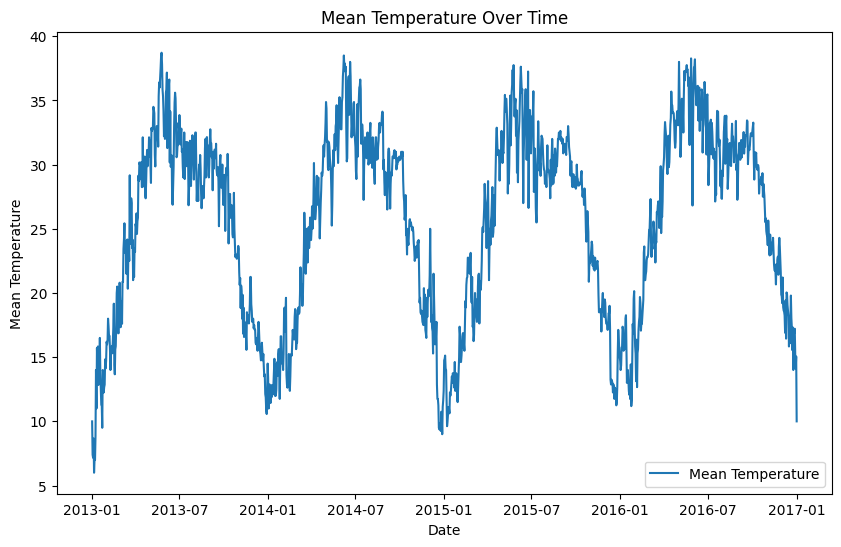

In [ ]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['meantemp'], label='Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Over Time')
plt.legend()
plt.show()

In [14]:
monthly_stats = df['meantemp'].resample('M').agg(['mean', 'median', 'std'])
print(monthly_stats['std'])

date
2013-01-31    3.064118
2013-02-28    1.849400
2013-03-31    2.628929
2013-04-30    2.115533
2013-05-31    2.572281
2013-06-30    2.769274
2013-07-31    1.601920
2013-08-31    1.733822
2013-09-30    1.636709
2013-10-31    2.528832
2013-11-30    1.789510
2013-12-31    1.991175
2014-01-31    1.510624
2014-02-28    2.200069
2014-03-31    2.840112
2014-04-30    2.339762
2014-05-31    2.321585
2014-06-30    2.388930
2014-07-31    2.263778
2014-08-31    1.705984
2014-09-30    1.267108
2014-10-31    2.587152
2014-11-30    2.423858
2014-12-31    4.524677
2015-01-31    1.440710
2015-02-28    2.942062
2015-03-31    3.596236
2015-04-30    3.175273
2015-05-31    2.548784
2015-06-30    2.870283
2015-07-31    2.386269
2015-08-31    1.436522
2015-09-30    1.416401
2015-10-31    2.442179
2015-11-30    2.039345
2015-12-31    2.647140
2016-01-31    2.363093
2016-02-29    3.197431
2016-03-31    1.946211
2016-04-30    1.626719
2016-05-31    2.710125
2016-06-30    1.752908
2016-07-31    2.173439
2016-0

/tmp/ipykernel_4244/4136340716.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stats = df['meantemp'].resample('M').agg(['mean', 'median', 'std'])


In [17]:
max_std_date = monthly_stats['std'].idxmax()
print("Date with highest monthly standard deviation:", max_std_date)

Date with highest monthly standard deviation: 2014-12-31 00:00:00


In [ ]:
baseline_values = df.loc['2013-01-31']
normalized_df = df / baseline_values

reference_pressure = df.loc['2013-01-01', 'meanpressure']
higher_pressure_dates = monthly_stats[monthly_stats['mean'] > reference_pressure * 1.20].index

higher_pressure_dates

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='ME')

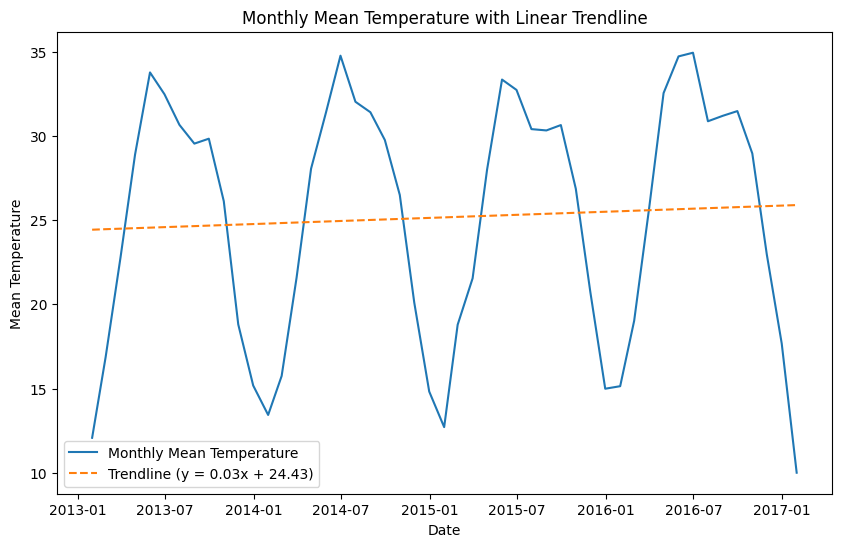

(np.float64(0.03), np.float64(24.43))

In [ ]:
import numpy as np

monthly_mean_temp = monthly_stats['mean'].dropna()
months = np.arange(len(monthly_mean_temp))

slope, intercept = np.polyfit(months, monthly_mean_temp, 1)

trendline = slope * months + intercept
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_temp.index, monthly_mean_temp, label='Monthly Mean Temperature')
plt.plot(monthly_mean_temp.index, trendline, label=f'Trendline (y = {slope:.2f}x + {intercept:.2f})', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Monthly Mean Temperature with Linear Trendline')
plt.legend()
plt.show()

slope_rounded = round(slope, 2)
intercept_rounded = round(intercept, 2)
slope_rounded, intercept_rounded